In [1]:
import pandas as pd

In [2]:
bird_data = pd.read_csv('bird_tracking.csv')
bird_data.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [3]:
bird_data.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [6]:
ix = bird_data.bird_name == 'Sanne'
date = bird_data.date_time[ix]
print(date[:1])

40923    2013-08-15 00:01:08+00
Name: date_time, dtype: object


In [9]:
date = bird_data.date_time[ix]
print(date[-1:])

61930    2014-04-30 23:59:34+00
Name: date_time, dtype: object


In [10]:
import datetime as dt

In [11]:
dt.datetime.today()

datetime.datetime(2022, 5, 31, 13, 29, 23, 88165)

In [12]:
time1 = dt.datetime.today()

In [13]:
time2 = dt.datetime.today()
time2 - time1

datetime.timedelta(seconds=10, microseconds=978715)

In [14]:
import pandas as pd
import datetime as dt

In [15]:
bird_data = pd.read_csv('bird_tracking.csv')
date_str = bird_data.date_time[0]
print(date_str)

2013-08-15 00:18:08+00


In [16]:
date_str[:-3]

'2013-08-15 00:18:08'

In [17]:
dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [18]:
a = dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')
print(a)

2013-08-15 00:18:08


In [19]:
timestamps = [
    dt.datetime.strptime(bird_data.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S') \
        for k in range(len(bird_data))
]
timestamps

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [20]:
bird_data['timestamp'] = pd.Series(timestamps, index=bird_data.index)
bird_data.timestamp[1] - bird_data.timestamp[0]

Timedelta('0 days 00:29:59')

In [21]:
a = bird_data.timestamp[1] - bird_data.timestamp[0]
print(a)

0 days 00:29:59


In [22]:
bird_data.index

RangeIndex(start=0, stop=61931, step=1)

In [23]:
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,NaN,49.419860,2.120733,0.191484,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,NaN,49.419880,2.120746,2.739698,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,NaN,49.420310,2.120885,0.360099,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,NaN,49.420359,2.120859,0.039658,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,NaN,49.420331,2.120887,0.107988,Eric,2013-08-15 02:17:42


In [24]:
import pandas as pd

In [25]:
bird_data = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(bird_data.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


In [26]:
import datetime as dt

In [27]:
# elapsed: 새 이동을 측정하기 시작한 시점부터 측정할 때마다의 시간을 누적시킨 수치
timestamps = [
    dt.datetime.strptime(bird_data.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S') \
        for k in range(len(bird_data))
]
bird_data['timestamp'] = pd.Series(timestamps, index=bird_data.index)

times = bird_data.timestamp[bird_data.bird_name == 'Eric']
elapsed = [time - times[0] for time in times]
elapsed[100]

Timedelta('1 days 05:24:41')

In [28]:
print(elapsed[0])
print(elapsed[1])
print(elapsed[100])

0 days 00:00:00
0 days 00:29:59
1 days 05:24:41


In [29]:
# 초기 100개 구간의 시간을 날짜 일수로 알고 싶을 때
elapsed[100] / dt.timedelta(days=1)

1.225474537037037

In [30]:
elapsed[100] / dt.timedelta(hours=1)

29.41138888888889

Text(0, 0.5, 'Elapsed(days)')

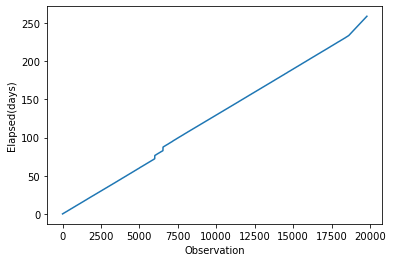

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.array(elapsed) / dt.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed(days)')

In [32]:
import pandas as pd

In [33]:
# Eric의 비행 속도 저장
bird_data = pd.read_csv('bird_tracking.csv')
ix = bird_data.bird_name == 'Eric'
speed = bird_data.speed_2d[ix]
print(speed.head())

0    0.191484
1    2.739698
2    0.360099
3    0.039658
4    0.107988
Name: speed_2d, dtype: float64


In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Flying Speed')

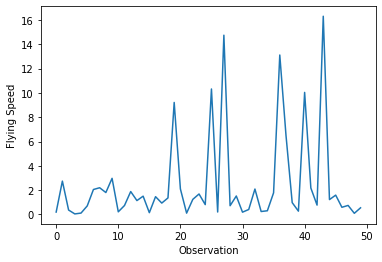

In [35]:
plt.plot(range(50), speed[:50])
plt.xlabel('Observation')
plt.ylabel('Flying Speed')

Text(0, 0.5, 'Flying Speed')

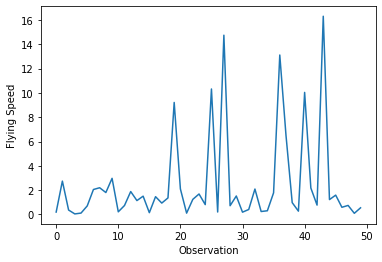

In [36]:
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']

plt.plot(range(50), speed[:50])
plt.xlabel('Observation')
plt.ylabel('Flying Speed')

In [37]:
import pandas as pd

In [38]:
bird_data = pd.read_csv('bird_tracking.csv')
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']
speed[218]

0.684238527673075

In [39]:
speed[219]

nan

In [40]:
import numpy as np

In [41]:
speed = np.array(speed)
print(np.isnan(speed))

[False False False ... False False False]


In [42]:
np.isnan(speed).any()

True

In [43]:
import pandas as pd

In [45]:
bird_data = pd.read_csv('bird_tracking.csv')
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']

In [46]:
import numpy as np

In [47]:
speed = np.array(speed)
np.isnan(speed)
print(np.isnan(speed))

[False False False ... False False False]


In [48]:
def get_nan(s):
    for i, n in enumerate(s):
        if np.isnan(n):
            return i


ind = get_nan(speed)
print(ind)

219


In [49]:
len(np.isnan(speed))

19798

In [50]:
import pandas as pd
import numpy as np

In [51]:
bird_data = pd.read_csv('bird_tracking.csv')
speed = bird_data.speed_2d[bird_data.bird_name == 'Eric']
speed = np.array(speed)
np.isnan(speed)

array([False, False, False, ..., False, False, False])

In [53]:
def get_nan(s):
    nan_list = []
    for i, n in enumerate(s):
        if np.isnan(n):
            nan_list.append(i)
    
    return nan_list


nan_list = get_nan(speed)
print(f'total number of NaN: {len(nan_list)}')
print(nan_list)

total number of NaN: 85
[219, 1006, 1232, 1255, 1531, 1731, 2470, 3219, 3406, 3413, 3430, 3436, 3597, 3617, 3638, 3738, 3743, 4049, 4068, 4120, 4149, 4357, 4514, 4594, 4689, 4779, 4929, 4984, 5010, 5027, 5117, 5158, 5736, 5745, 5904, 6003, 6572, 6665, 6934, 6974, 7430, 7597, 8180, 8933, 9202, 9325, 9357, 9426, 9593, 10107, 10143, 10153, 10163, 10553, 10942, 10944, 11321, 12618, 12762, 13096, 13182, 13284, 14110, 14476, 14997, 15031, 15104, 15579, 15774, 15811, 15910, 16785, 16977, 17947, 18235, 18316, 19196, 19519, 19528, 19548, 19623, 19624, 19756, 19774, 19781]


In [55]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

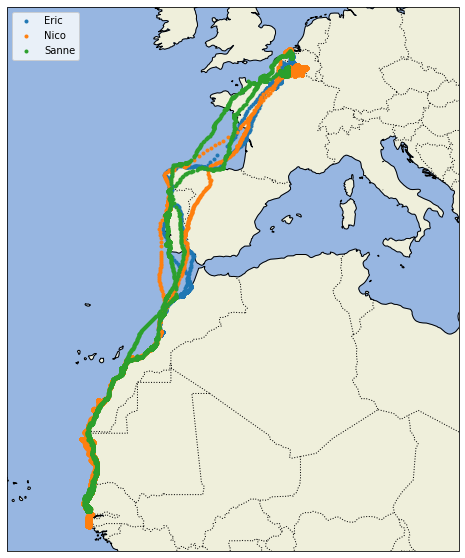

In [59]:
proj = ccrs.Mercator()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = bird_data['bird_name'] == name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc='upper left')

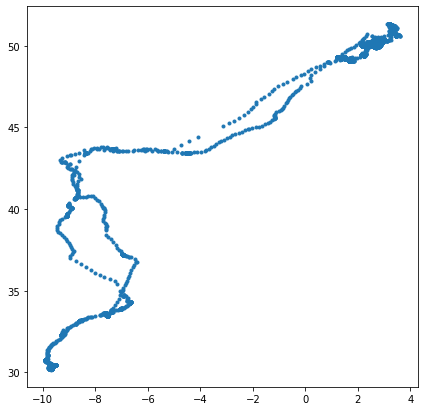

In [60]:
ix = bird_data.bird_name == 'Eric'
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

plt.figure(figsize=(7, 7))
plt.plot(x, y, '.')

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import distance

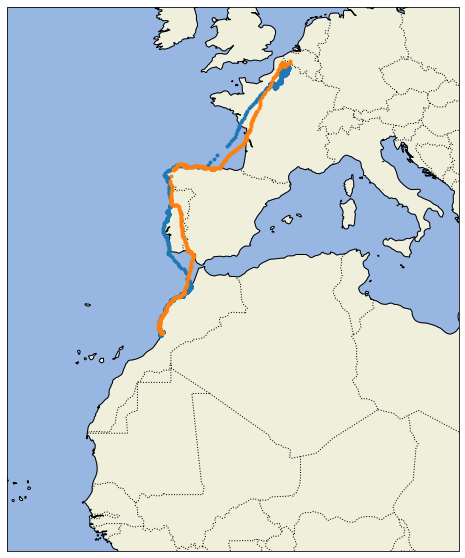

In [63]:
proj = ccrs.Mercator()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

bird_data = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(bird_data.bird_name)
ix = bird_data['bird_name'] == 'Eric'
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

# 남하
ax.plot(x[0:17000], y[0:17000], '.', transform=ccrs.Geodetic())
# 북상
ax.plot(x[17101:18600], y[17101:18600], '.', transform=ccrs.Geodetic())